### Assignment-1

1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Columns you want to analyze
columns = ['City', 'State', 'Weather_Condition']

for col in columns:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print("Most frequent:", df[col].value_counts().idxmax())
    print("Count:", df[col].value_counts().max())



Column: City
Unique values: 13678
Most frequent: Miami
Count: 186917

Column: State
Unique values: 49
Most frequent: CA
Count: 1741433

Column: Weather_Condition
Unique values: 144
Most frequent: Fair
Count: 2560802


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [2]:
# Calculate percentage of missing values for each column
missing_percent = (df.isnull().mean() * 100).round(2)

# Display all percentages
print("Missing Value Percentage in Each Column:\n")
print(missing_percent)

# Columns with more than 5% missing data
cols_over_5 = missing_percent[missing_percent > 5]

print("\nColumns with more than 5% missing data:\n")
print(cols_over_5)


Missing Value Percentage in Each Column:

ID                        0.00
Source                    0.00
Severity                  0.00
Start_Time                0.00
End_Time                  0.00
Start_Lat                 0.00
Start_Lng                 0.00
End_Lat                  44.03
End_Lng                  44.03
Distance(mi)              0.00
Description               0.00
Street                    0.14
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.02
Country                   0.00
Timezone                  0.10
Airport_Code              0.29
Weather_Timestamp         1.56
Temperature(F)            2.12
Wind_Chill(F)            25.87
Humidity(%)               2.25
Pressure(in)              1.82
Visibility(mi)            2.29
Wind_Direction            2.27
Wind_Speed(mph)           7.39
Precipitation(in)        28.51
Weather_Condition         2.24
Amenity                   0.00
Bump                      0.

3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [6]:
# Convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'],format='mixed')

# Find earliest and latest accident start times
earliest = df['Start_Time'].min()
latest = df['Start_Time'].max()

print("Earliest accident start time:", earliest)
print("Latest accident start time:", latest)


Earliest accident start time: 2016-01-14 20:18:33
Latest accident start time: 2023-03-31 23:30:00


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [4]:
# Count duplicate records
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate records: 0


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Percentage of accidents by severity level:

Severity
2    79.67
3    16.81
4     2.65
1     0.87
Name: proportion, dtype: float64


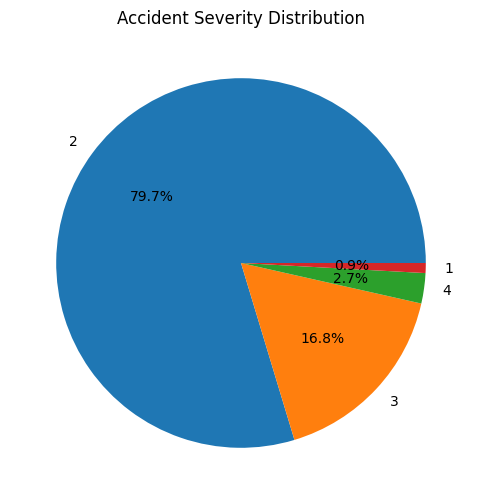

In [5]:
import matplotlib.pyplot as plt

# Percentage distribution of Severity
severity_percent = (df['Severity'].value_counts(normalize=True) * 100).round(2)
print("Percentage of accidents by severity level:\n")
print(severity_percent)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    severity_percent,
    labels=severity_percent.index,
    autopct='%1.1f%%'
)
plt.title("Accident Severity Distribution")
plt.show()
